In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
import seaborn as sns
import os
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
import lightgbm as ltb
from sklearn.ensemble import ExtraTreesRegressor
random.seed(0)

In [158]:
previous_application = pd.read_csv("data/previous_application.csv")
application_train = pd.read_csv('data/application_train.csv')

In [159]:
pd.set_option('display.max_columns', None)

In [160]:
previous_application.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [162]:
previous_application.shape

(1670214, 37)

In [163]:
#merging pre_app with "TARGET" from app_train
application_prev_train = application_train.iloc[:,:2].merge(previous_application, on = 'SK_ID_CURR', how = 'left')

In [164]:
application_prev_train.shape

(1430155, 38)

In [165]:
application_prev_train.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [166]:
application_prev_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1430155.0,2.784702e+05,102802.095340,1.000020e+05,1.893610e+05,2.789560e+05,3.675090e+05,456255.000
TARGET,1430155.0,8.624240e-02,0.280722,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000
SK_ID_PREV,1413701.0,1.922744e+06,532715.335255,1.000001e+06,1.461346e+06,1.922698e+06,2.384012e+06,2845381.000
AMT_ANNUITY,1106483.0,1.583718e+04,14724.906897,0.000000e+00,6.257858e+03,1.122376e+04,2.042078e+04,418058.145
AMT_APPLICATION,1413701.0,1.752436e+05,293622.193141,0.000000e+00,1.975050e+04,7.087050e+04,1.800000e+05,5850000.000
AMT_CREDIT,1413700.0,1.963541e+05,319481.250716,0.000000e+00,2.488050e+04,8.059500e+04,2.156400e+05,4509688.500
AMT_DOWN_PAYMENT,664161.0,6.655317e+03,20620.300440,-9.000000e-01,0.000000e+00,1.791000e+03,7.695000e+03,3060045.000
AMT_GOODS_PRICE,1094176.0,2.264512e+05,315937.604200,0.000000e+00,4.982850e+04,1.102455e+05,2.295000e+05,5850000.000
HOUR_APPR_PROCESS_START,1413701.0,1.247893e+01,3.331474,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1413701.0,9.964321e-01,0.059626,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000


In [167]:
#Check duplication
application_prev_train.duplicated().sum()

0

In [168]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [169]:
#Check missing
missing_data(application_prev_train)

,Total,Percent
RATE_INTEREST_PRIMARY,1425364,99.665001
RATE_INTEREST_PRIVILEGED,1425364,99.665001
AMT_DOWN_PAYMENT,765994,53.560209
RATE_DOWN_PAYMENT,765994,53.560209
NAME_TYPE_SUITE,711126,49.723701
NFLAG_INSURED_ON_APPROVAL,577560,40.384434
DAYS_TERMINATION,577560,40.384434
DAYS_LAST_DUE,577560,40.384434
DAYS_LAST_DUE_1ST_VERSION,577560,40.384434
DAYS_FIRST_DUE,577560,40.384434


In [170]:
#Drop irrelevant/ columns with high percentage of NaN
previous_application_filtered = application_prev_train.loc[:, application_prev_train.columns.intersection([
    'TARGET','NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
    'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 
    'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'])]

In [171]:
previous_application_filtered.head()

,TARGET,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Consumer loans,SATURDAY,XAP,Approved,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest,0.0
1,0,Cash loans,FRIDAY,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,1.0
2,0,Consumer loans,SUNDAY,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,0.0
3,0,Consumer loans,SATURDAY,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest,1.0
4,0,Consumer loans,FRIDAY,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest,0.0


In [189]:
def barplot(col,graph_name = 'Insert graph name',percentage_display = True,\
             label_rotation=False,horizontal_layout=True):
    temp = previous_application_filtered[col].value_counts()
    tempdf = pd.DataFrame({col: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = previous_application_filtered[[col, 'TARGET']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = col, y="Number of contracts",data=tempdf)
    s.set(title = graph_name)
#    if percentage_display:
#        total_datapoints = len(previous_application_filtered[col].dropna())
#        for p in s.patches:
#            s.text(p.get_x() + horizontal_layout, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = 10)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = col, y='TARGET', order=cat_perc[col], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [209]:
def pie(data, column_name,pie_name = 'Insert graph name', plot_defaulter = True, hole = 0):

    
    if plot_defaulter:
        cols = 2
        specs = [[{'type' : 'domain'}, {'type' : 'domain'}]]
        titles = [f'Distribution of all contracts', f'Percent of target with value 1 [%]']
    else:
        cols = 1
        specs = [[{'type': 'domain'}]]
        titles = [f'Distribution of {column_name} for all Targets']
        
    values_categorical = data[column_name].value_counts()
    labels_categorical = values_categorical.index
    
    fig = make_subplots(rows = 1, cols = cols, 
                       specs = specs, 
                       subplot_titles = titles)
    
    fig.add_trace(go.Pie(values = values_categorical, labels = labels_categorical, hole = hole, 
                         textinfo = 'label+percent', textposition = 'inside'), row = 1, col = 1)
    
    if plot_defaulter:
        percentage_defaulter_per_category = data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()
        percentage_defaulter_per_category.dropna(inplace = True)
        percentage_defaulter_per_category = percentage_defaulter_per_category.round(2)
        
        fig.add_trace(go.Pie(values = percentage_defaulter_per_category, labels = percentage_defaulter_per_category.index, 
                             hole = hole, textinfo = 'label+value', hoverinfo = 'label+value'), row = 1, col = 2)
        
    fig.update_layout(title = pie_name)
    fig.show()

In [210]:
#Contract product type of previous application
pie(previous_application_filtered, "NAME_CONTRACT_TYPE",'Contract product type of previous application')

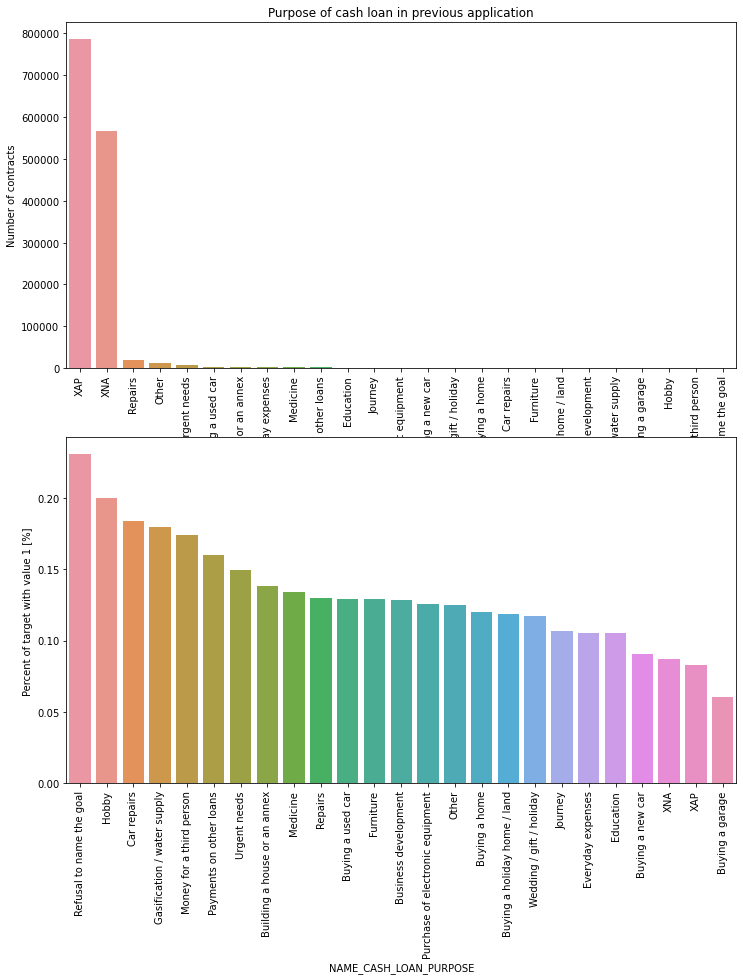

In [192]:
barplot('NAME_CASH_LOAN_PURPOSE','Purpose of cash loan in previous application', label_rotation=True, percentage_display=False, horizontal_layout=False)

In [211]:
pie(previous_application_filtered,'NAME_CONTRACT_STATUS','Approval status of application')

In [212]:
pie(previous_application_filtered,'NAME_PAYMENT_TYPE','Payment method that client chose')

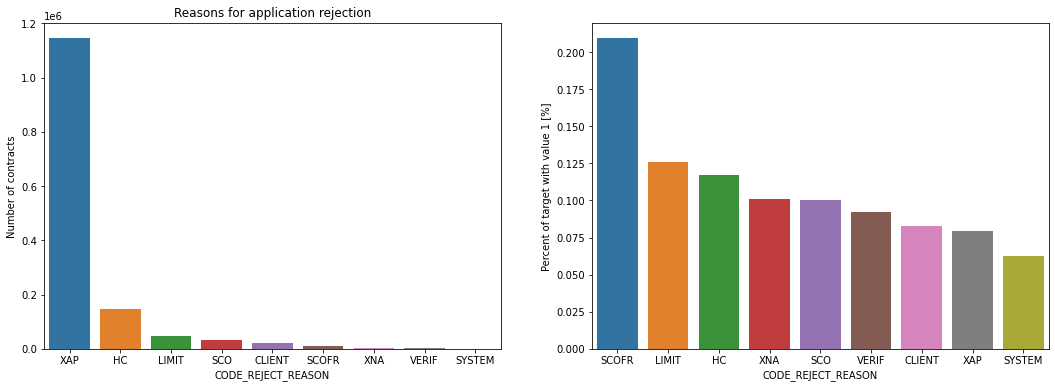

In [213]:
barplot('CODE_REJECT_REASON','Reasons for application rejection')

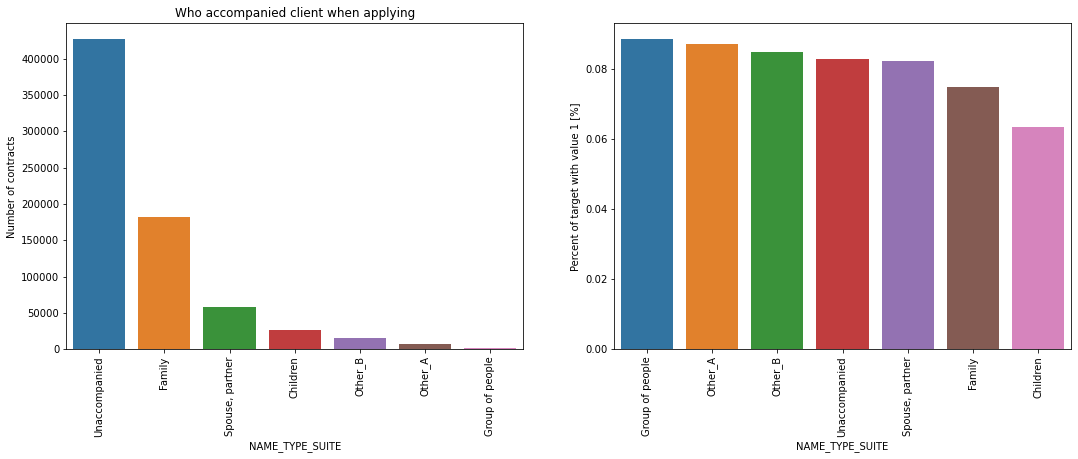

In [214]:
barplot('NAME_TYPE_SUITE', 'Who accompanied client when applying', label_rotation=True)

In [215]:
pie(previous_application_filtered,'NAME_CLIENT_TYPE', 'Was the client old or new client when applying')

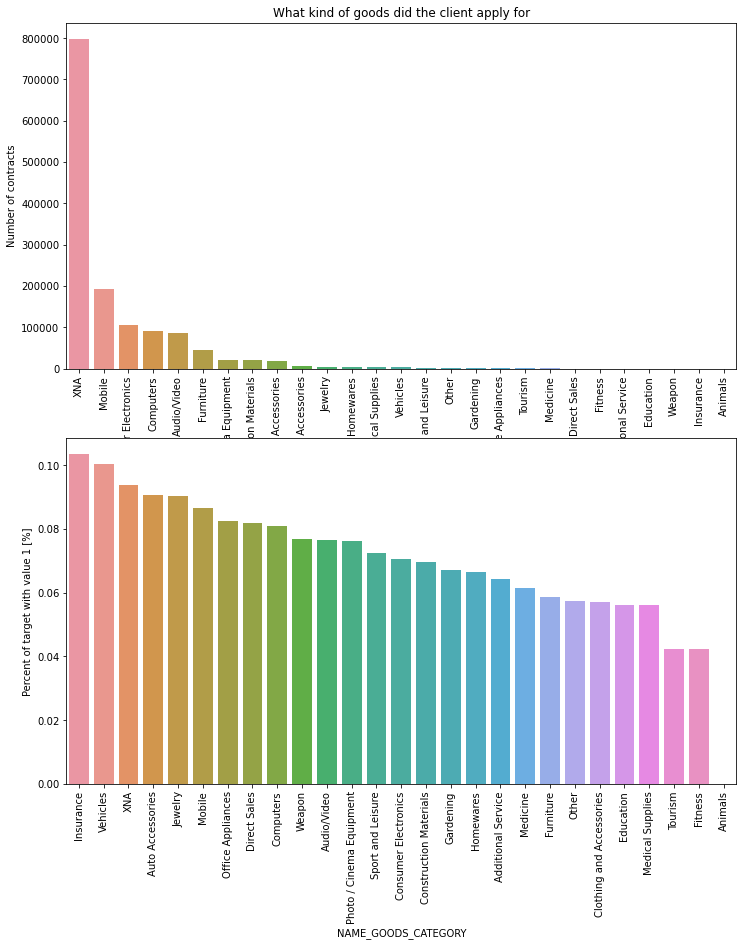

In [198]:
barplot('NAME_GOODS_CATEGORY','What kind of goods did the client apply for',label_rotation=True,horizontal_layout=False)

In [216]:
pie(previous_application_filtered, 'NAME_PORTFOLIO', 'Portfolio type of the application')

In [217]:
pie(previous_application_filtered, 'NAME_PRODUCT_TYPE', 'Was the application x-sell or walk-in')

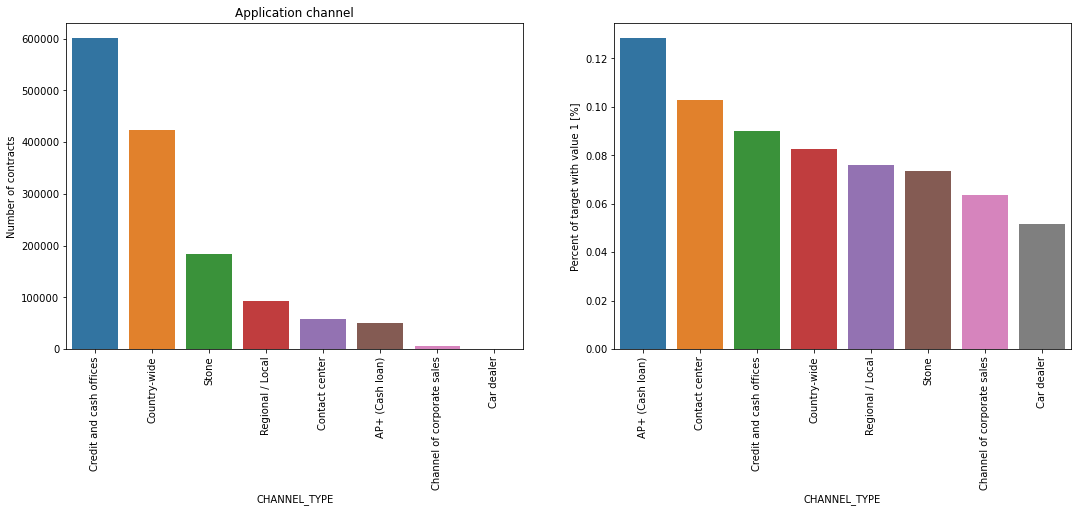

In [208]:
barplot('CHANNEL_TYPE','Application channel',label_rotation=True)

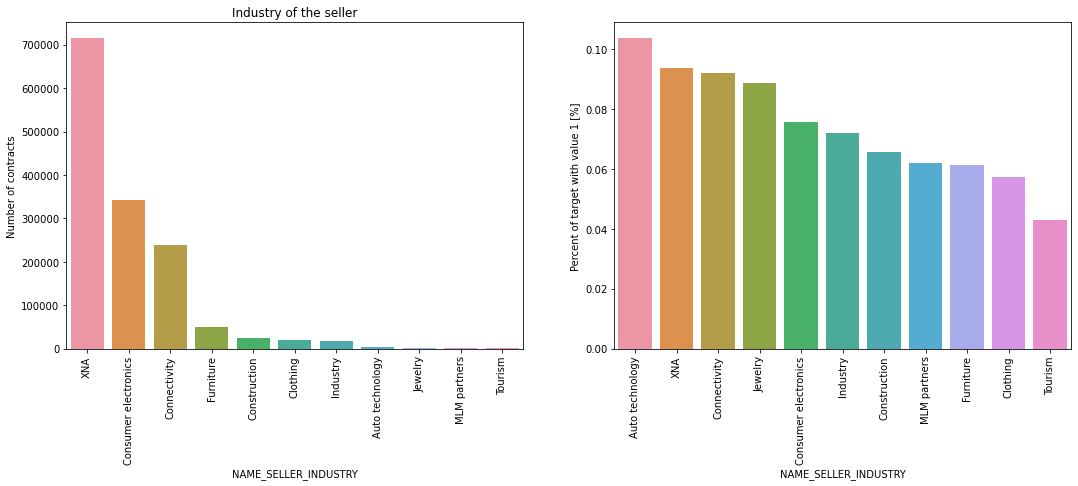

In [220]:
barplot('NAME_SELLER_INDUSTRY','Industry of the seller',label_rotation=True)

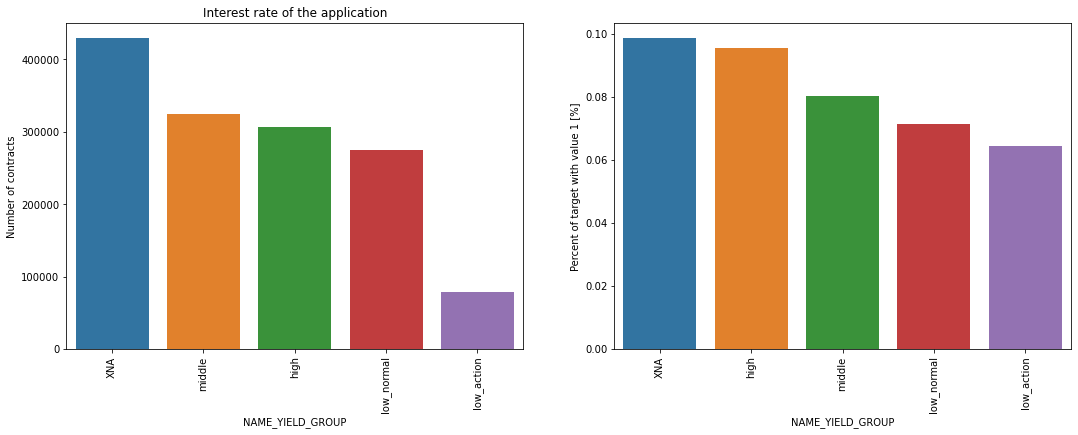

In [221]:
barplot('NAME_YIELD_GROUP','Interest rate of the application',label_rotation=True)

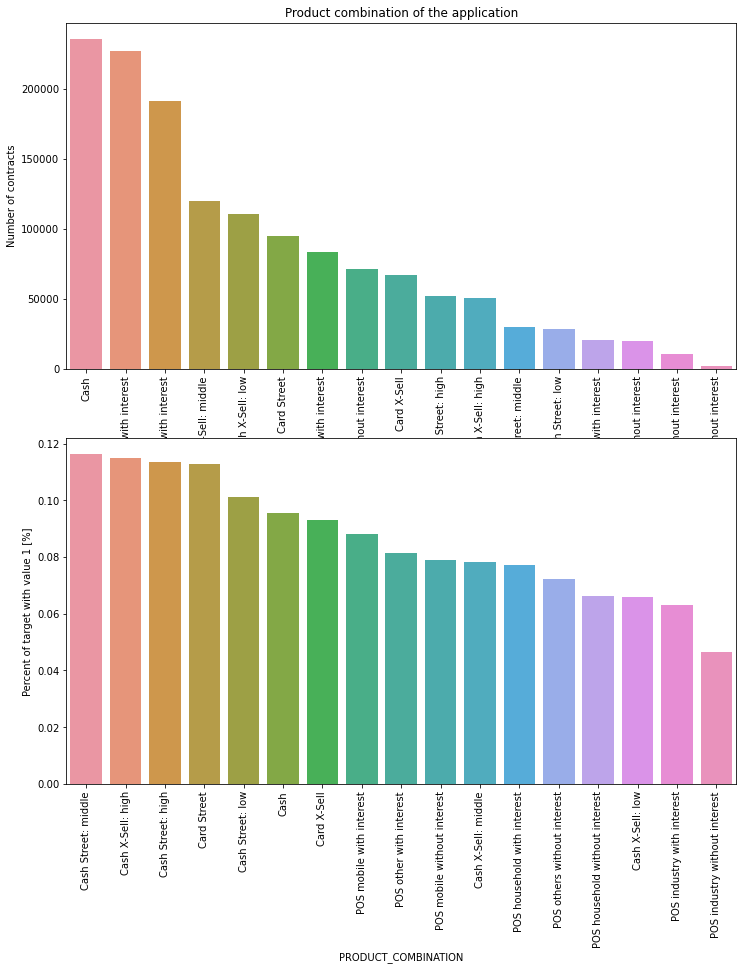

In [224]:
barplot('PRODUCT_COMBINATION','Product combination of the application',label_rotation=True, horizontal_layout=False)

In [225]:
pie(previous_application_filtered,'NFLAG_INSURED_ON_APPROVAL', 'Did the client requested insurance during the application')

In [200]:
def fix_nulls(data):
    data['NAME_TYPE_SUITE'].fillna('Data_Not_Available', inplace=True)
    data['NFLAG_INSURED_ON_APPROVAL'].fillna('Data_Not_Available', inplace=True)
    data['PRODUCT_COMBINATION'].fillna('Data_Not_Available', inplace=True)
    return data.head()

In [226]:
fix_nulls(previous_application_filtered)

,TARGET,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Consumer loans,SATURDAY,XAP,Approved,XNA,XAP,Data_Not_Available,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest,0.0
1,0,Cash loans,FRIDAY,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,1.0
2,0,Consumer loans,SUNDAY,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,0.0
3,0,Consumer loans,SATURDAY,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest,1.0
4,0,Consumer loans,FRIDAY,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest,0.0
